In [3]:
pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\sahil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import re
import string

from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [5]:
df = pd.read_csv('UpdatedResumeDataSet.csv', encoding='ISO-8859-1')


In [6]:
print(df.columns.tolist())



['Category', 'Resume']


In [7]:
df = df[['Category', 'Resume']]    # Ensure only required columns


In [8]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."


In [9]:
df.tail()

,Category,Resume
957,Testing,Computer Skills: â?¢ Proficient in MS office (...
958,Testing,â? Willingness to accept the challenges. â? ...
959,Testing,"PERSONAL SKILLS â?¢ Quick learner, â?¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [10]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join back to string
    return " ".join(tokens)

df['cleaned_resume'] = df['Resume'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text_advanced(text):
    # Lowercase
    text = text.lower()

    # Remove non-ASCII characters (like 芒垄 etc.)
    text = text.encode('ascii', 'ignore').decode()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize
    tokens = text.split()

    # Remove stopwords and non-alphabetic words
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join back
    return " ".join(tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
df['cleaned_resume'] = df['Resume'].apply(clean_text_advanced)


In [13]:
le = LabelEncoder()
df['encoded_category'] = le.fit_transform(df['Category'])


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['cleaned_resume'])
y = df['encoded_category']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Final DataFrame with required columns
final_df = df[['Category', 'encoded_category', 'cleaned_resume']]


In [17]:
final_df.to_csv('preprocessed_resumes.csv', index=False)


In [ ]:
# from google.colab import files
# files.download('preprocessed_resumes.csv')


**Preprocessed End**

***NLP Start***

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np


In [19]:
# Assuming df['cleaned_resume'] already exists
vectorizer = TfidfVectorizer(max_features=3000)  # you can change max_features
tfidf_matrix = vectorizer.fit_transform(df['cleaned_resume'])

# Convert to DataFrame (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())


In [20]:
def get_top_keywords(row_vector, feature_names, top_n=10):
    sorted_indices = row_vector.argsort()[::-1][:top_n]
    top_features = [(feature_names[i], row_vector[i]) for i in sorted_indices]
    return [word for word, score in top_features]


In [21]:
top_keywords = []
feature_names = vectorizer.get_feature_names_out()

for i in range(tfidf_matrix.shape[0]):
    row_vector = tfidf_matrix[i].toarray().flatten()
    keywords = get_top_keywords(row_vector, feature_names, top_n=10)
    top_keywords.append(", ".join(keywords))

df['top_keywords'] = top_keywords


In [22]:
df.to_csv('resume_with_keywords_TF-IDF.csv', index=False)


**below code is giving accuracy al most 0.99**

In [23]:

# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# X = tfidf_matrix
# y = df['encoded_category']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = LogisticRegression(max_iter=1000)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("TF-IDF Classification Accuracy:", accuracy)


In [24]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Step 1: TF-IDF vectorization
# vectorizer = TfidfVectorizer(max_features=3000)
# X = vectorizer.fit_transform(df['cleaned_resume'])  # X = features
# y = df['encoded_category']                          # y = label

# # Step 2: Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42)

# # Step 3: Train classifier
# model = LogisticRegression(max_iter=1000)
# model.fit(X_train, y_train)

# # Step 4: Predict & check accuracy
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# print("TF-IDF Classification Accuracy:", round(accuracy * 100, 2), "%")


C:\Users\sahil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


TF-IDF Accuracy: 87.34 %
Fold-wise Accuracies: [88.24 90.91 93.94 84.85 78.79]


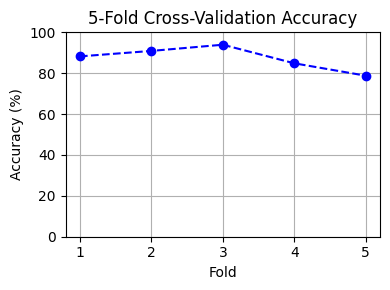

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load cleaned data again if needed
df = df.drop_duplicates(subset='cleaned_resume')  # Remove duplicates if not already

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=3000)


# TF-IDF vectorization with filters
vectorizer = TfidfVectorizer(max_features=3000, min_df=5, max_df=0.85)
X = vectorizer.fit_transform(df['cleaned_resume'])
y = df['encoded_category']

# Logistic Regression with class weight balance
# model = LogisticRegression(max_iter=1000, class_weight='balanced')

# model = RandomForestClassifier(n_estimators=100, class_weight='balanced')

model = SVC(kernel='linear', class_weight='balanced')

# 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Output accuracy
print("TF-IDF Accuracy:", round(scores.mean() * 100, 2), "%")
print("Fold-wise Accuracies:", np.round(scores * 100, 2))
plt.figure(figsize=(4, 3))
plt.plot(range(1, 6), scores * 100, marker='o', linestyle='--', color='b')
plt.title('5-Fold Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.xticks(range(1, 6))
plt.tight_layout()
plt.show()

Accuracy: 99.59 %
Fold-wise Accuracies: [ 97.93 100.   100.   100.   100.  ]


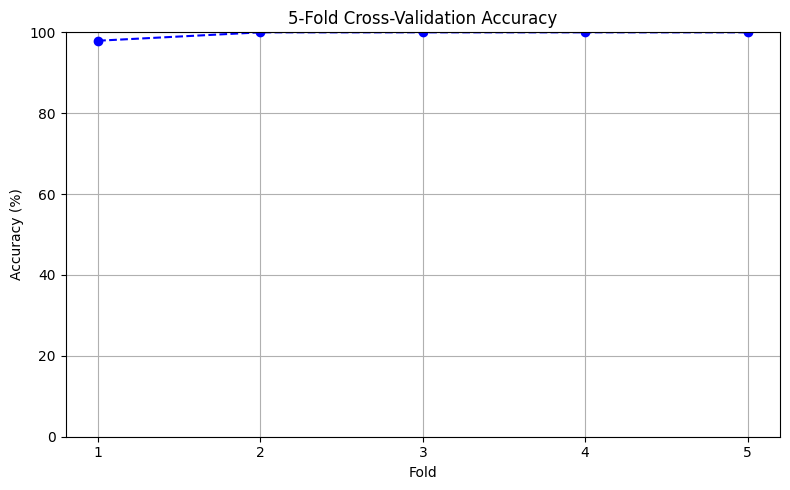

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import SVC
# from sklearn.model_selection import cross_val_score
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# # Ensure df and y are defined
# # df should have columns: 'cleaned_resume' and 'encoded_category'
# df = pd.read_csv('preprocessed_resumes.csv')
# # 1. Vectorization
# vectorizer = TfidfVectorizer(max_features=3000, min_df=5, max_df=0.85)
# X = vectorizer.fit_transform(df['cleaned_resume'])
# y = df['encoded_category']

# # 2. Model definition
# model = SVC(kernel='linear', class_weight='balanced')

# # 3. Cross-validation
# scores = cross_val_score(model, X, y, cv=5)

# # 4. Print results
# print("Accuracy:", round(scores.mean() * 100, 2), "%")
# print("Fold-wise Accuracies:", np.round(scores * 100, 2))

# # 5. Plot accuracy per fold
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, 6), scores * 100, marker='o', linestyle='--', color='b')
# plt.title('5-Fold Cross-Validation Accuracy')
# plt.xlabel('Fold')
# plt.ylabel('Accuracy (%)')
# plt.ylim(0, 100)
# plt.grid(True)
# plt.xticks(range(1, 6))
# plt.tight_layout()
# plt.show()


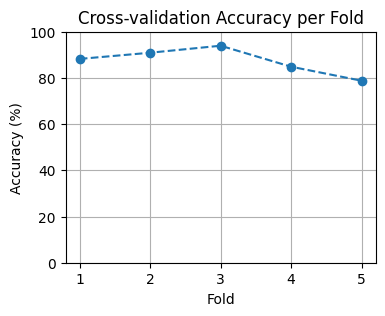

In [27]:

import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
plt.plot(range(1, 6), scores * 100, marker='o', linestyle='--')
plt.title('Cross-validation Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()


C:\Users\sahil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\sahil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\sahil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\sahil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking

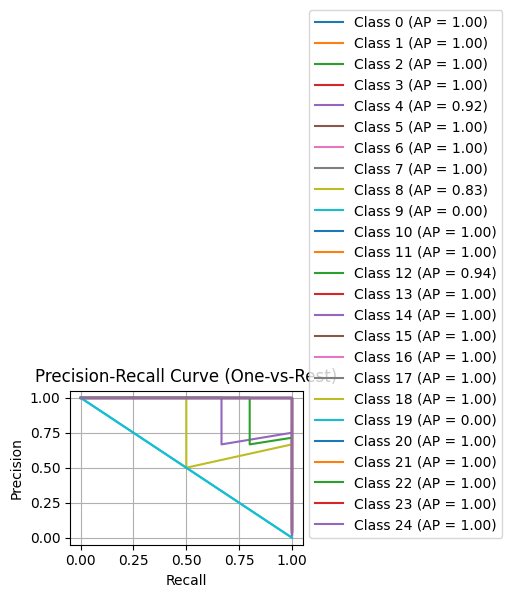

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define classes and binarize labels
classes = np.unique(y)
y_bin = label_binarize(y, classes=classes)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Step 3: Train One-vs-Rest classifier
ovr_model = OneVsRestClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'))
ovr_model.fit(X_train, y_train)

# Step 4: Get decision function scores
y_score = ovr_model.decision_function(X_test)

# Step 5: Plot Precision-Recall curves
plt.figure(figsize=(3, 2))
for i in range(len(classes)):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    ap_score = average_precision_score(y_test[:, i], y_score[:, i])
    plt.plot(recall, precision, label=f'Class {classes[i]} (AP = {ap_score:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (One-vs-Rest)')
plt.legend(loc='lower left', bbox_to_anchor=(1.0, 0))  # Place legend outside if needed
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# # If using LogisticRegression
# from sklearn.linear_model import LogisticRegression

# lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
# lr_model.fit(X, y)

# feature_names = vectorizer.get_feature_names_out()
# for i, class_label in enumerate(lr_model.classes_):
#     top_indices = np.argsort(lr_model.coef_[i])[-10:]
#     print(f"Top words for class {class_label}:")
#     print([feature_names[j] for j in top_indices])


Top words for class 0:
['mumbai', 'tax', 'chennai', 'university', 'district', 'llb', 'court', 'advocate', 'law', 'legal']
Top words for class 1:
['board', 'maharashtra', 'nagpur', 'workshop', 'commerce', 'total', 'state', 'day', 'drawing', 'art']
Top words for class 2:
['integration', 'regression', 'tech', 'mahindra', 'case', 'manual', 'selenium', 'testing', 'test', 'automation']
Top words for class 3:
['crm', 'analytics', 'networking', 'january', 'computer', 'nashik', 'contract', 'technology', 'smart', 'blockchain']
Top words for class 4:
['maintain', 'gathering', 'report', 'process', 'test', 'functional', 'requirement', 'cash', 'analyst', 'business']
Top words for class 5:
['building', 'drawing', 'autocad', 'inspection', 'material', 'project', 'construction', 'engineer', 'site', 'civil']
Top words for class 6:
['deep', 'month', 'analytics', 'year', 'science', 'machine', 'python', 'less', 'learning', 'data']
Top words for class 7:
['recovery', 'log', 'administrator', 'rman', 'installa

In [29]:
print(df['Category'].value_counts())



Category
Java Developer               13
Database                     11
Advocate                     10
HR                           10
Data Science                 10
Automation Testing            7
DevOps Engineer               7
Testing                       7
DotNet Developer              7
Hadoop                        7
SAP Developer                 6
Python Developer              6
Health and fitness            6
Civil Engineer                6
Arts                          6
Business Analyst              6
Sales                         5
Blockchain                    5
Mechanical Engineer           5
ETL Developer                 5
Electrical Engineering        5
Network Security Engineer     5
Web Designing                 4
Operations Manager            4
PMO                           3
Name: count, dtype: int64


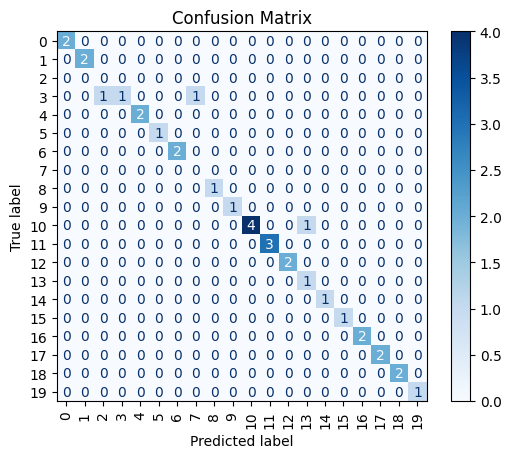

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=90)
plt.title("Confusion Matrix")
plt.show()


In [31]:
from sklearn.metrics import classification_report

# Unique labels in test set
unique_labels = sorted(np.unique(y_test))

# Map encoded_category to Category name (safe mapping)
label_map = df.drop_duplicates('encoded_category').set_index('encoded_category')['Category'].to_dict()
target_names = [label_map[label] for label in unique_labels]

# Classification report
print(classification_report(y_test, y_pred, labels=unique_labels, target_names=target_names))


                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         2
                     Arts       1.00      1.00      1.00         2
         Business Analyst       1.00      0.33      0.50         3
           Civil Engineer       1.00      1.00      1.00         2
             Data Science       1.00      1.00      1.00         1
                 Database       1.00      1.00      1.00         2
            ETL Developer       1.00      1.00      1.00         1
   Electrical Engineering       1.00      1.00      1.00         1
                       HR       1.00      0.80      0.89         5
                   Hadoop       1.00      1.00      1.00         3
       Health and fitness       1.00      1.00      1.00         2
           Java Developer       0.50      1.00      0.67         1
      Mechanical Engineer       1.00      1.00      1.00         1
Network Security Engineer       1.00      1.00      1.00     